In [1]:
# importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score , confusion_matrix ,precision_score , recall_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("data.csv")
df.head()
    

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
uni=[]
lst=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
for i in lst:
    uni.append(list(df[i].unique()))

pd.DataFrame(uni , index=lst).fillna(" ")

,0,1,2,3,4,5,6,7,8,9,10
Gender,Male,Female,,,,,,,,,
Married,No,Yes,,,,,,,,,
Dependents,0,1,2,3+,,,,,,,
Education,Graduate,Not Graduate,,,,,,,,,
Self_Employed,No,Yes,,,,,,,,,
Loan_Amount_Term,360.0,120.0,240.0,,180.0,60.0,300.0,480.0,36.0,84.0,12.0
Credit_History,1.0,0.0,,,,,,,,,
Property_Area,Urban,Rural,Semiurban,,,,,,,,
Loan_Status,Y,N,,,,,,,,,


In [5]:
df["Dependents"]=df["Dependents"].str.replace("+","")

In [6]:
np.round(df.isnull().mean()*100,2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [7]:
df.dropna(inplace=True)

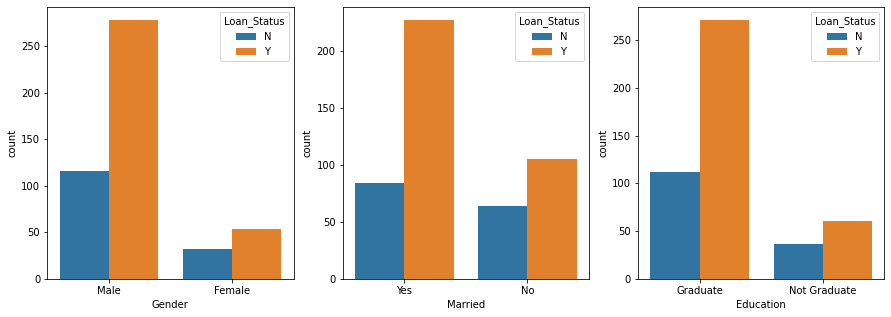

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data=df ,x="Gender",hue="Loan_Status",ax=ax1)
sns.countplot(data=df ,x="Married",hue="Loan_Status" ,ax=ax2)
sns.countplot(data=df ,x="Education",hue="Loan_Status",ax=ax3)
plt.show()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

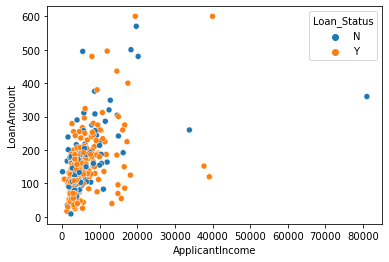

In [9]:
sns.scatterplot(data=df ,x="ApplicantIncome" ,y="LoanAmount",hue="Loan_Status")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

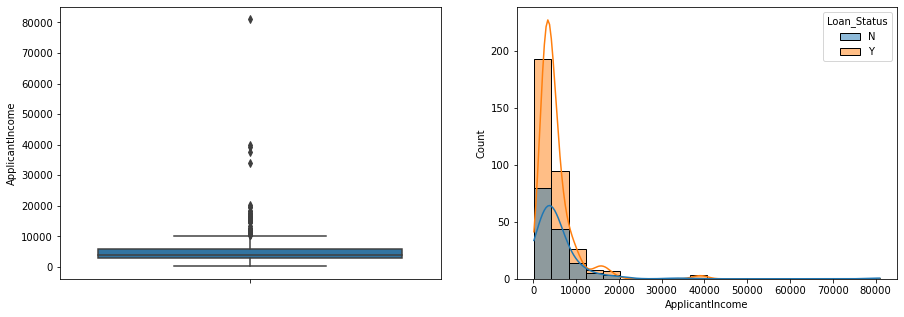

In [10]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df,y="ApplicantIncome",ax=ax1)
sns.histplot(data=df,x="ApplicantIncome" ,kde=True ,bins=20,ax=ax2,hue="Loan_Status")

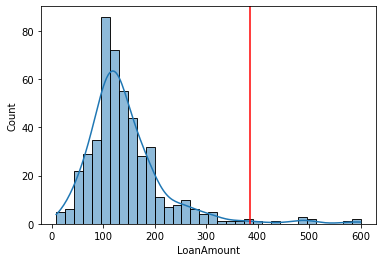

In [11]:
sns.histplot(data=df,x="LoanAmount" ,kde=True)
plt.axvline(df.LoanAmount.mean()+df.LoanAmount.std()*3 , c='red')

<AxesSubplot:>

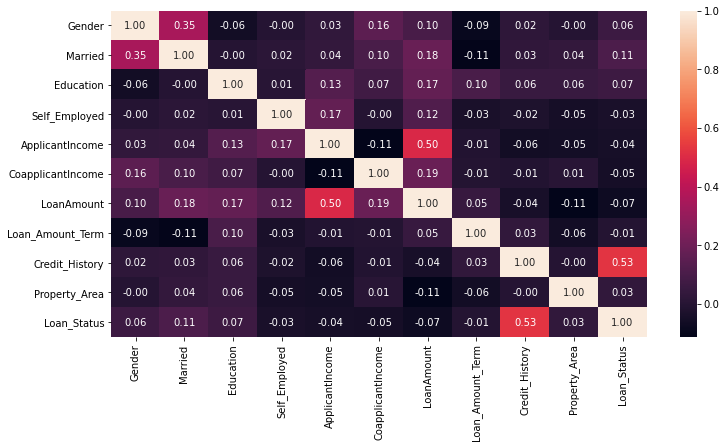

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True,fmt=".2f")

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [14]:
# label encoding 

from sklearn.preprocessing import LabelEncoder ,OneHotEncoder,OrdinalEncoder

In [15]:
le=LabelEncoder()
le.fit(df["Loan_Status"])
df["Loan_Status"]=le.transform(df["Loan_Status"])

In [16]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [17]:
df.drop('Loan_ID',axis=1,inplace=True)

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


### Splitting Dataset

In [19]:
# splittting dataset into train and test

x=df.drop("Loan_Status",axis=1)
y=df.Loan_Status

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.2,stratify=y,random_state=2)

In [35]:
480*.8

384.0

In [31]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(384, 11) (384,)
(96, 11) (96,)


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVC


In [22]:
!pip install xgboost

In [23]:
from xgboost import XGBClassifier

### Trainning model Support vector classifier

In [24]:
# modelling
model = svm.SVC(kernel="linear")
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Acuracy_of svc : " ,accuracy_score(y_test,y_pred))
print("Preciesion score : ",precision_score(y_test , y_pred))
print("Recall score  : ",recall_score(y_test , y_pred))
confusion_matrix(y_test , y_pred)

Acuracy_of svc :  0.8229166666666666
Preciesion score :  0.8024691358024691
Recall score  :  0.9848484848484849


array([[14, 16],
       [ 1, 65]], dtype=int64)

### Trainning model Logistic Regression


In [25]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Acuracy_of Logistic : " ,accuracy_score(y_test,y_pred))
print("Preciesion score : ",precision_score(y_test , y_pred))
print("Recall score  : ",recall_score(y_test , y_pred))
confusion_matrix(y_test , y_pred)




Acuracy_of Logistic :  0.8333333333333334
Preciesion score :  0.8205128205128205
Recall score  :  0.9696969696969697


array([[16, 14],
       [ 2, 64]], dtype=int64)

### Trainning model DecisionTree

In [26]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Acuracy_of Logistic : " ,accuracy_score(y_test,y_pred))
print("Preciesion score : ",precision_score(y_test , y_pred))
print("Recall score  : ",recall_score(y_test , y_pred))
confusion_matrix(y_test , y_pred)



Acuracy_of Logistic :  0.71875
Preciesion score :  0.819672131147541
Recall score  :  0.7575757575757576


array([[19, 11],
       [16, 50]], dtype=int64)

### Trainning model RandomForest

In [27]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Acuracy_of Logistic : " ,accuracy_score(y_test,y_pred))
print("Preciesion score : ",precision_score(y_test , y_pred))
print("Recall score  : ",recall_score(y_test , y_pred))
confusion_matrix(y_test , y_pred)

Acuracy_of Logistic :  0.8125
Preciesion score :  0.8333333333333334
Recall score  :  0.9090909090909091


array([[18, 12],
       [ 6, 60]], dtype=int64)

### Trainning model GradientBoostingClassifier

In [28]:

model = GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Acuracy_of Logistic : " ,accuracy_score(y_test,y_pred))
print("Preciesion score : ",precision_score(y_test , y_pred))
print("Recall score  : ",recall_score(y_test , y_pred))
confusion_matrix(y_test , y_pred)

Acuracy_of Logistic :  0.8333333333333334
Preciesion score :  0.8571428571428571
Recall score  :  0.9090909090909091


array([[20, 10],
       [ 6, 60]], dtype=int64)